<a href="https://colab.research.google.com/github/gundasai/Gender-Recognition-by-Voice-in-python/blob/master/0011z_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tamato 


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/PlantVillage')
os.getcwd()

'/content/drive/My Drive/PlantVillage'

### Datasets and Pre Processing

In [0]:
import keras
import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
x=[]
y=[]
path='/content/drive/My Drive/PlantVillage/Tomato__Target_Spot'
for i in os.listdir(path):
  img=image.load_img(os.path.join(path,i),color_mode='rgb')
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)
  y.append(0)
path='/content/drive/My Drive/PlantVillage/Tomato__Tomato_mosaic_virus'
for i in os.listdir(path):
  img=image.load_img(os.path.join(path,i),color_mode='rgb')
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)
  y.append(1)
x=np.array(x)
y=np.array(y)

In [0]:
from sklearn.utils import shuffle
(x,y)=shuffle(x,y)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1190, 256, 256, 3)
(1190,)
(587, 256, 256, 3)
(587,)
4
float32
4
float32
4
float32


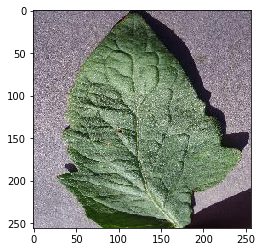

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

1190
256
256


In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [0]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1 1
0 0
0.4601809
0.18787156
2.8733413 2.8733413
-2.4494443 -2.4494443


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],256,256,3)
xtest =  xtest.reshape(xtest.shape[0],256,256,3)

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[1. 0.]


### LeNet Model

In [0]:
import keras
from keras import models
from keras import layers

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(256,256,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 252, 252, 6)       456       
_________________________________________________________________
average_pooling2d_3 (Average (None, 126, 126, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 16)      2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 61, 61, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 59536)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               7144440   
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

### Visualization of randomly initialized filters

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="bgr")
    filter_index += 1

NameError: ignored

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[ 0.09090638 -0.1024743  -0.12471508 -0.09387411 -0.15254442]
 [-0.14411667  0.15558824  0.01075104  0.04250716  0.02201375]
 [-0.13628957 -0.05449878 -0.04257116 -0.10284378  0.04703233]
 [ 0.15253308  0.09311128 -0.0004095  -0.11663928 -0.03432934]
 [-0.01771899  0.08274977 -0.01376373 -0.05034842 -0.01953442]]

[[ 0.0327574   0.07632472 -0.14404008 -0.03776772  0.16293103]
 [ 0.16021466 -0.00687645 -0.0297443  -0.09720962 -0.04995444]
 [-0.10264483 -0.1070205  -0.04170399 -0.11176896  0.05688053]
 [-0.14052847  0.04067801 -0.15631098  0.04173093 -0.03774257]
 [-0.08318999 -0.16033122 -0.13253033  0.04521775 -0.10315731]]

[[ 0.01011498  0.14952284  0.1616807  -0.03528692  0.0938842 ]
 [-0.08708534  0.10577366  0.04990746  0.12412196  0.06425168]
 [-0.07737857 -0.10349133  0.08881557 -0.04153416  0.01673089]
 [ 0.11407068 -0.11113715 -0.10605873 -0.12057679  0.12605688]
 [-0.13638526  0.06469637 -0.11594684  0.04959019  0.07400127]]

[[ 0.1419557   0.03678979  0.05312726  0.09956172

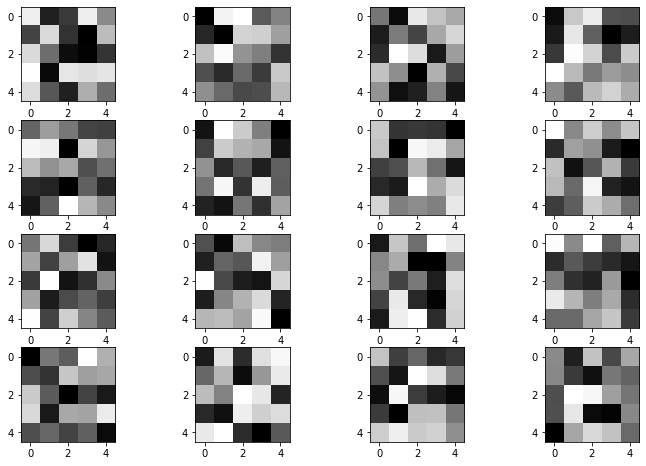

In [0]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.07095663 -0.076038   -0.05779788  0.07037282 -0.00076324]
 [-0.05162129  0.05612586 -0.06370746 -0.09985491  0.03471956]
 [ 0.05630668 -0.02196972 -0.09057463 -0.09777109 -0.06144595]
 [ 0.08286628 -0.09313184  0.06431304  0.05865286  0.06372501]
 [ 0.05752438 -0.03739079 -0.07620582  0.02445    -0.02178296]]

[[-9.7110406e-02  8.2502365e-02  9.1967121e-02 -2.9515550e-02
  -5.6922436e-05]
 [-6.7967691e-02 -9.7143158e-02  5.9075847e-02  5.5854112e-02
   2.1050707e-02]
 [ 4.6162322e-02  8.8163391e-02  1.1813410e-02 -3.1273216e-03
  -5.9919585e-02]
 [-3.8542978e-02 -6.5534294e-02 -1.8973961e-02 -5.3455420e-02
   5.1555768e-02]
 [ 8.6908489e-03 -1.8554561e-02 -4.2154416e-02 -3.9854296e-02
   3.8965359e-02]]

[[ 0.00223435 -0.07766037  0.08690472  0.05941176  0.04025459]
 [-0.06460995  0.00691272 -0.03492417  0.03946188  0.07344939]
 [-0.05341871  0.10405983  0.0787304  -0.06649177  0.03128053]
 [ 0.05891643  0.01994304 -0.08535308  0.04489516 -0.03200381]
 [ 0.02438822 -0.07360939 -0.

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

### Compile and Training the model

In [0]:
os.chdir('/content/drive/My Drive/PlantVillage')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

filepath = "saved-model-{epoch:02d}.h5"

#mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)

cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

#rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.00)

#es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

/content/drive/My Drive/PlantVillage


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=50, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 952 samples, validate on 238 samples
Epoch 1/50
952/952 [==============================] - 11s 12ms/step - loss: 0.5757 - acc: 0.6208 - val_loss: 0.4922 - val_acc: 0.7479

Epoch 00001: val_loss improved from inf to 0.49218, saving model to CNN_MNIST.h5
Epoch 2/50
952/952 [==============================] - 1s 1ms/step - loss: 0.4295 - acc: 0.7889 - val_loss: 0.4306 - val_acc: 0.7479

Epoch 00002: val_loss improved from 0.49218 to 0.43056, saving model to CNN_MNIST.h5
Epoch 3/50
952/952 [==============================] - 1s 1ms/step - loss: 0.3566 - acc: 0.8141 - val_loss: 0.4043 - val_acc: 0.7479

Epoch 00003: val_loss improved from 0.43056 to 0.40425, saving model to CNN_MNIST.h5
Epoch 4/50
952/952 [==============================] - 1s 1ms/step - loss: 0.2736 - acc: 0.8897 - val_loss: 0.3029 - val_acc: 0.8319

Epoch 00004: val_loss improved from 0.40425 to 0.30291, saving model to C

### Evaluate

In [0]:
model.evaluate(xtest,ytest)

587/587 [==============================] - 1s 2ms/step


[0.07170986156479107, 0.979557069846678]

### Prediction

In [0]:
pred=model.predict(xtest[0].reshape(1,256,256,3))
print(pred)
print(pred.argmax())

[[9.999964e-01 3.551782e-06]]
0


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

587/587 [==============================] - 1s 1ms/step
0.07170986156479107
0.979557069846678


### Loss and Accuracy Curves

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(len(train_loss))

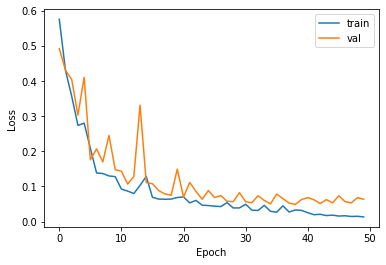

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

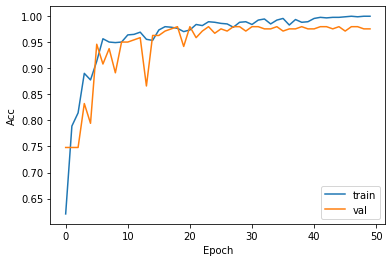

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 256, 256, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [1. 0.] Predicted is 0
2 Actual is  [1. 0.] Predicted is 0
3 Actual is  [1. 0.] Predicted is 0
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [1. 0.] Predicted is 0
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [1. 0.] Predicted is 0


In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99       475
     class 1       0.97      0.92      0.94       112

    accuracy                           0.98       587
   macro avg       0.98      0.96      0.97       587
weighted avg       0.98      0.98      0.98       587



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[472   3]
 [  9 103]]


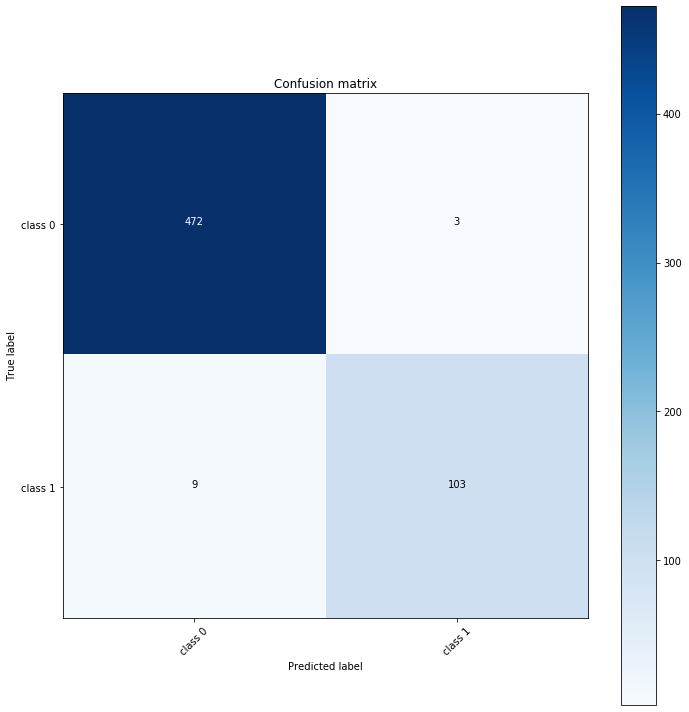

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [0]:
for layer in model.layers:
  print(layer)

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

In [0]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

In [0]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])